# DSCI 572 "lecture" 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
plt.rcParams['font.size'] = 16

Outline:

- True/False (25 min)
- Sequences (10 min)
- Break (5 min)
- Optimization software (15 min)
- Logistic regression (25 min)

## Gradient descent true/false

1. Before starting gradient descent, we don't know how many steps we'll need to reach a desired level of accuracy.
2. To use gradient descent, we need to apply the gradient **operator** once, but evaluate the gradient **function** many times.
3. The main disadvantage of setting the learning rate, $\alpha$, too small is that convergence will be very slow.
4. The main disadvantage of setting the learning rate, $\alpha$, too large is that convergence will be very slow.

<br><br><br><br><br><br><br><br><br><br>

## Data space and parameter space T/F:

1. In supervised learning, every point in the parameter space corresponds to a regression/classification surface in the data space.
2. In general, dimensionality of the data space $\geq$ dimensionality of the parameter space.
3. Each iteration of gradient descent moves you to a new point in parameter space.
4. The loss function defines a score for each point in data space.
5. In logistic regression, the labels in the data space are discrete but the parameters are continuous. 

<br><br><br><br><br><br><br><br><br><br>

## Sequences (10 min)

- The idea of gradient descent relies on the idea of a _sequence_.
- You may have seen sequences in math class, e.g.

$$x_{i+1} = x_i + 1,\quad x_0=0$$

- The sequence is defined by explaining how the next iterate (i.e. the next $x$) is related to the previous one.
- The sequence is $x_0=0,x_1=1,x_2=2,\ldots,x_n=n$.
- In this case, it would have been easier to just write $x_n=n$ and be done with it.
- But that's not always possible - sometimes it gets complicated.

Some "notes":

- The above could have been defined as $x_i=x_{i-1}+1$, it makes no difference. 
- Some sequences depend on multiple previous values, like the Fibonnaci sequence $x_{i}=x_{i-1}+x_{i-2}$, but we can ignore these for now.
  - In gradient descent the current iterate only depends on the previous one.
 

#### Convergence

- Some sequences _converge_ and others don't.
- The one above doesn't coverge, but rather $x$ just keeps growing.
- Here is a sequence that converges: $$x_{i+1}=x_{i}+ \left(\frac12\right)^{i},\quad x_0=0$$

In [3]:
x = 0
for i in range(1,20):
    x = x + (0.5)**i
    print(x)

0.5
0.75
0.875
0.9375
0.96875
0.984375
0.9921875
0.99609375
0.998046875
0.9990234375
0.99951171875
0.999755859375
0.9998779296875
0.99993896484375
0.999969482421875
0.9999847412109375
0.9999923706054688
0.9999961853027344
0.9999980926513672


It seems this sequence converges to the final value of $1$. It keeps getting closer and closer.

#### Multivariate sequences

We can also have sequences with multiple variables, e.g.

$$\begin{align*}x_{i+1}&=2x_i- x_i y_i\\ y_{i+1}&=0.5y_i+x_iy_i\end{align*}$$

This can also be written in vector form, assuming $x_{i+1}$ is now a vector, as follows:

$$x_{i+1} = f(x_i)$$

where $f(x)$ is a function from two variables to two variables.


In [4]:
def f(x):
    xnew = 2*x[0]-x[0]*x[1]
    ynew = 0.5*x[1]+x[0]*x[1]
    return (xnew, ynew)

In [5]:
x = (1,1)
for i in range(10):
    x = f(x)
    print("(%.3f, %.3f)" % x)

(1.000, 1.500)
(0.500, 2.250)
(-0.125, 2.250)
(0.031, 0.844)
(0.036, 0.448)
(0.056, 0.240)
(0.099, 0.134)
(0.184, 0.080)
(0.354, 0.055)
(0.688, 0.047)


#### Gradient descent notation

Gradient descent is defined as follows:

$$w_{i+1}=w_i - \alpha_i \nabla f(w_i)$$

- We use $w$ for the iterates instead of $x$ because we're changing the model parameters (weights), $w$.
- This is a multivariate sequence because $w$ is a vector.
- However, you may see this written a variety of different ways.
- Sometimes we use $t$ as the index instead of $i$, because it's sort of like "time"
  - And because $i$ is already used to index training examples.
- Sometimes we want to avoid $w_i$ because $w$ is a vector and this is the $i$th $w$-vector, NOT the $i$ element of $w$.
- Thus in the video I wrote

$$w^{t+1}=w^t-\alpha^t\nabla f(w^t)$$

- But this too is confusing because it looks like "$w$ to the power of $t$"
- One could also try

$$w^{(t+1)}=w^{(t)}-\alpha^{(t)}\nabla f\left(w^{(t)}\right)$$

which is probably the most clear, but also pretty messy.

#### Gradient descent as a sequence

- Gradient descent defined a sequence of iterates.
- It needs an initial value too, which we provide in our code, for example by setting $w=0$ or some random numbers.
  - This choice is important, because setting $w=0$ can cause problems as well see later in the course.
- Key idea: we choose the sequence carefully so that it _converges_ to a global minimum of $f$.
- One can show that this happens under some reasonable conditions, like sufficiently small $\alpha$, convex and smooth $f$.

#### Magnitude and direction of the gradient

- Note that what we really care about is the direction of the gradient.
- However, the magnitude is useful too - when the function is steeper, we take bigger steps even for a fixed $\alpha$.

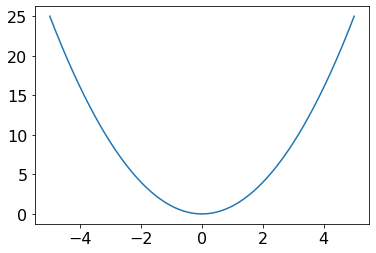

In [6]:
grid = np.linspace(-5,5,1000)
plt.plot(grid, grid**2);

## Break (5 min)

## Optimizer syntax (10 min)

In [7]:
from scipy.optimize import minimize

- This (Python) function can be used to numerically optimize (mathematical) functions.
- For example, if we have the mathematical function $f(x)=(x-3)^2$, we know the minimum occurs at $x=3$.

In [8]:
def f(x):
    return (x-3)**2

In [9]:
minimize(f, 0).x

array([2.99999998])

Let's unpack the above:

- `minimize` is a Python function that takes in _another Python function_.
  - That's because it needs to repeatedly call `f` to minimize it. 
- We also had to pass in a starting guess. 
  - I just passed in 0. It then made its way from $x=0$ to $x=3$.
- Why the `.x` at the end? That's because `minimize` returns a bunch of stuff:

In [14]:
minimize(f, 0)

      fun: 2.5388963550532293e-16
 hess_inv: array([[0.5]])
      jac: array([-1.69666681e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

- We are generally interested in the solution, which is stored as an attribute called `x`. 
- But note also the `nfev` - that is short for "number of function evaluations". 
  - We can verify that our function was called 9 times by adding a print statement in it:

In [15]:
def f(x):
    print("Someone called this function!")
    return (x-3)**2

In [16]:
minimize(f, 0)

Someone called this function!
Someone called this function!
Someone called this function!
Someone called this function!
Someone called this function!
Someone called this function!
Someone called this function!
Someone called this function!
Someone called this function!


      fun: 2.5388963550532293e-16
 hess_inv: array([[0.5]])
      jac: array([-1.69666681e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

- Indeed, `minimize` called our function `f` 9 times.
- As a reminder, that's why we pass in our function - so that `minimize` can call it with whatever $x$ it wants.

#### Passing in the gradient

- We talked about how having the gradient is very useful - practically essential - in most continuous optimization problems.
  - So, how did the code above work without passing in the gradient?
  - The answer is that it is approximating the gradient by calling the loss function a bunch of times.
  - There used to be a whole lecture on this, but I removed it this year. You can still access the old notes from the course README.
- TLDR: you should be passing in the gradient unless there is a very good reason not to.
  - With `scipy.optimize.minimize` this is done through the `jac` argument.

In [17]:
def f(x):
    return (x-3)**2

In [18]:
def df_dx(x):
    return 2*(x-3)

- Note that in this case the gradient is just a number (derivative), because we only had one variable.

In [19]:
minimize(f, 0, jac=df_dx)

      fun: 0.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([3.])

- Now look at `nfev` - it's only 3! 
- The `njev` tells us how many times the gradient function was called - in this case also 3.
- Let's add those `print` statements again.

In [20]:
def f(x):
    print("Someone called f")
    return (x-3)**2

In [21]:
def df_dx(x):
    print("Someone called df_dx")
    return 2*(x-3)

In [22]:
minimize(f, 0, jac=df_dx)

Someone called df_dx
Someone called f
Someone called f
Someone called df_dx
Someone called f
Someone called df_dx


      fun: 0.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([3.])

- In general, the speed of the optimize will be dominated by the function evaluations, so we want this number to be small.
- In this case, supplying the gradient reduced the total number of calls from 9 to 6.
- However, in real problems the reduction will be much more.
- This is again covered in the deleted lecture. But in short, the improvement will scale with the number of variables. 
  - So if you have $1000$ weights it should be around $1000$ times faster!

#### Passing in extra args

- A very common scenario, like we see in lab, is that we have a loss function that takes multiple arguments.
- For example, here is the ordinary least squares linear regression loss, copied from lecture 1:

In [23]:
def f(w, X, y):
    return np.sum((X@w-y)**2)

def f_grad(w, X, y):
    return X.T@(X@w) - X.T@y

- Here, $w$ are the weights (parameters we are trying to learn), and $X$ and $y$ are the dataset.
- Now, remember that optimization routines like `minimize` will call your function.
- But they will only pass in one argument, and yet our `f` takes 3 arguments. 
  - This will cause an error:

In [24]:
n, d = 100, 5
X = np.random.rand(n,d)
y = np.random.choice((-1,+1),size=n)
w_init = np.zeros(d)

In [25]:
minimize(f, w_init, jac=f_grad)

TypeError: f_grad() missing 2 required positional arguments: 'X' and 'y'

- Note that while the `w` argument will change during the optimization, `X` and `y` stay the same.
- There are two approaches to dealing with this problem:

1. Wrapper functions
2. `args` keyword

**Approach 1: wrapper functions**

In [26]:
def f_wrapper(w):
    return f(w, X, y)

def f_grad_wrapper(w):
    return f_grad(w, X, y)

These wrapper functions just call the original functions with the same original `X` and `y`, and the given `w`.

In [27]:
minimize(f_wrapper, w_init, jac=f_grad_wrapper).x

array([-0.17243988,  0.17638165,  0.25346338, -0.73524592,  0.39544609])

It is customary to use anonymous functions for brevity:

In [28]:
minimize(lambda w: f(w,X,y), w_init, jac=lambda w: f_grad(w, X, y)).x

array([-0.17243988,  0.17638165,  0.25346338, -0.73524592,  0.39544609])

This is exactly the same as the named wrapper functions.

**Approach 2: `args` keyword**

The folks at scipy recognized how common this is, and conveniently made an optional argument to `minimize` called `args` for exactly this issue:

In [29]:
minimize(f, w_init, jac=f_grad, args=(X,y)).x

array([-0.17243988,  0.17638165,  0.25346338, -0.73524592,  0.39544609])

- This assumes the first argument to your `f` and `f_grad` are the variables being optimized ($w$), and then it passed in the args afterwards, in order. 
- I think `args` is a rather confusing name. I would have preferred `additional_args` because they come after the main argument, $w$.

## Logistic regression (25 min)

- More than any other topic I've seen, logistic regression spans both statistics and ML.
- In DSCI 562, you'll learn about logistic regression as a GLM, with the link function, maximum likelihood, etc.
- That formulation is equivalent, but we'll do things differently:
  - In ML, we encode $y$ as $+1$ and $-1$, as opposed to $1$ and $0$. This makes our math a bit cleaner.
  - We'll also think more from an optimization perspective rather than a likelihood / distributional assumptions perspective. 

#### Logistic regression: predict

In DSCI 571 you talked about how logistic regression makes predictions. To recap:

- It is a linear model, which makes it a close cousin of linear regression.
  - There's one coefficient per feature, plus an intercept, just like linear regression.
  - We combine our features and coefficients with a dot product, that is $w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d$.
  - We'll often ignore the intercept because of the "column of ones" trick discussed in DSCI 561 and/or 573.
  - With linear regression, we can write the predictions very succinctly as $Xw$. This is matrix multiplication. 
  - We take each row of $X$ and dot-product it with $w$. So the result is a vector of all our predictions.
  - We'll do something similar here.
- It is a classification algorithm. Since it's linear and a classifier, we call it a linear classifier.
  - The decision boundary is a hyperplane dividng the feature space (aka data space) in half.
  - You can think of the coefficients as controlling the orientation of the boundary.
- We generally use _regularization_ with logistic regression. 
  - This will be covered later in DSCI 573.
  - Next year we'll have DSCI 573 earlier to solve this sort of issue.

#### Logistic regression: probabilities

- When you take $w^Tx$, this is what I call the "raw model output".
- For linear regression this would have been the prediction.
- For logistic regression, you check the **sign** of this value.
  - If positive, predict $+1$; if negative, predict $-1$.
  - I call these "hard predictions".
- You can also have "soft predictions", aka predicted probabilities. 
  - To convert the raw model output into probabilities, instead of taking the sign, we apply the sigmoid.


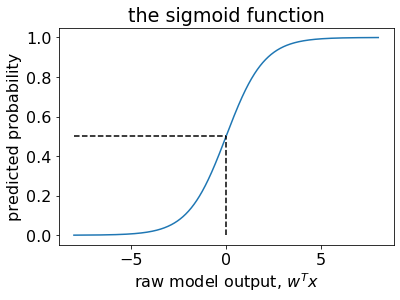

In [32]:
raw_model_output = np.linspace(-8,8,1000)
sigmoid = lambda x: 1/(1+np.exp(-x))
plt.plot(raw_model_output, sigmoid(raw_model_output));
plt.plot([0,0],[0,0.5], '--k')
plt.plot([-8,0],[0.5,0.5], '--k')
plt.xlabel("raw model output, $w^Tx$");
plt.ylabel("predicted probability");
plt.title("the sigmoid function");

- The sigmoid function "squashes" the raw model output from any number to the range $[0,1]$.
- Then we can interpret the output as probabilities.
- Recall our hard predictions that check the sign of $w^Tx$, or, in other words, whether or not it is $> 0$.
  - The threshold $w^Tx=0$ corresponds to $p=0.5$. 
  - In other words, if our predicted probability is above $0.5$ then our hard prediction is $+1$.
  - This makes intuitive sense.

#### Logistic regression loss

- So now we've covered the `predict` and `predict_proba` side of things.
- Next we need to talk about `fit`, i.e. the loss.
- I'll leave the maximum likelihood interpretation of the loss to DSCI 562. Instead, here let's take a different perspective. 
- The squared error $f(w)=\sum_{i=1}^n (w^Tx_i-y_i)^2$ doesn't make sense here.
  - For example, if $w^Tx_i$ is 1000 and $y_i$ is $+1$ that would be a huge loss, but actually the model is behaving correctly, because $1000$ is positive and so it will predict $+1$.
  - Thus, we need a new loss that encourages $w^Tx_i$ to be positive when $y_i$ is $+1$ and encourages $w^Tx_i$ to be negative when $y_i$ is $-1$.
- Key idea: multiply $y_iw^Tx_i$. We always want this quantity to be positive! Why?
  - If $y_i$ and $w^Tx_i$ have the _same sign_, it will be positive.
  - If they have _oppositve signs_, it will be negative.
- So, we want a loss that's sort of like $-\sum_{i=1}^n y_iw^Tx_i$. By making this small, we encourage the model to make correct predictions.  
  - The above loss does not quite work out (I believe it has no minimum in most cases), but we do something similar instead:
  
$$f(w)=\sum_{i=1}^n\log\left(1+\exp(-y_iw^Tx_i)\right)$$

- The key idea here is that this function gets smaller as $y_iw^Tx_i$ gets larger, so it encourages correct classification. Here's the function:

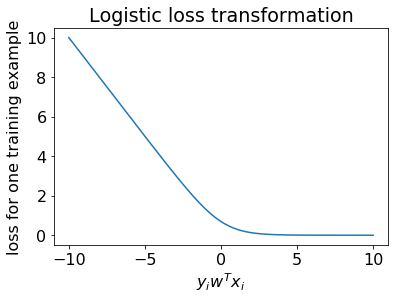

In [33]:
grid = np.linspace(-10,10,1000)
fun = lambda z: np.log(1+np.exp(-z))
plt.plot(grid, fun(grid));
plt.xlabel("$y_iw^Tx_i$");
plt.ylabel("loss for one training example")
plt.title("Logistic loss transformation");

I think a common misconception is confusing this function, $\log(1+\exp(-z))$, with the sigmoid function from earlier, $1/(1+\exp(-z))$. They look very similar and both are used in logistic regression but they are not the same function!!! And they have very different purposes. 

- $\log(1+\exp(-z))$ maps $y_iw^Tx_i$ to a positive number, which is the loss contribution from one training example. This is important in `fit`.
- $1/(1+\exp(-z))$ maps $w^Tx_i$ to a number in $[0,1]$, to be interpreted as a probability. This is important in `predict_proba`. (But comes into the statistics derivation of the loss, which adds extra confusion.) 

#### Error vs. loss

- With earlier methods like random forests, we just talked about accuracy (or error rate, which is 1 minus accuracy).
- With logistic regression, there are two separate metrics we need to keep in mind.
- scikit-learn's `score` returns the accuracy. 

In [34]:
lr = LogisticRegression(fit_intercept=False)
lr.fit(X, y); # fit on random data from earlier

/Users/mgelbart/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
lr.score(X,y)

0.56

- So we got this accuracy, and the error is 1 minus this. 
- But the loss is different. Here's the code from lab 1:

In [36]:
def loss_lr(w, X, y):
    return np.sum(np.log(1 + np.exp(-y*(X@w))))

In [37]:
loss_lr(np.squeeze(lr.coef_), X, y)

66.30090359049787

In [38]:
from sklearn.metrics import log_loss

In [39]:
log_loss(y, lr.predict_proba(X), normalize=False)

66.30090359049787

Bam - we get the same result.

- So, why not use the error rate as the loss, and directly maximize accuracy?
- Because it's not a smooth function, which makes it hard to optimize.
- This is a bit beyond the scope of the course.

## (optional) More on data space / parameter space

- In the gradient descent video, the data space was 2D (1D linear regression) and the parameter space was 2D (slope and intercept).
- This doesn't have to be the case at all. 

Example 1: no intercept term

- Here, the data space is the same as in the video, but the parameter space is only 1D

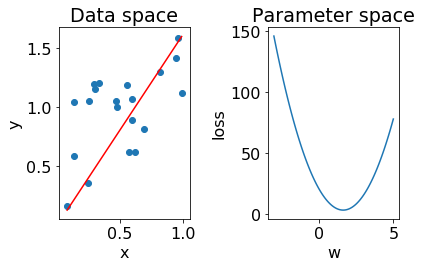

In [40]:
# Generate data
n = 20
X = np.random.rand(n,1)
y = np.random.rand(n,1) + X

# Compute loss
w_grid = np.linspace(-3,5,100);
pred = X@w_grid[None]
loss_grid = np.sum((pred-y)**2,axis=0)

w_best = w_grid[np.argmin(loss_grid)]

# Plot data space
plt.subplot(1,2,1)
plt.scatter(X,y);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Data space')

# Plot best line
x_grid = np.linspace(np.min(X),np.max(X),100)[:,None]
plt.plot(x_grid, x_grid*w_best[None], 'red')


plt.subplot(1,2,2)
plt.plot(w_grid, loss_grid);
plt.xlabel('w');
plt.ylabel('loss');
plt.title('Parameter space')
plt.tight_layout();

Example 2: polynomial regression or interaction terms

- Here, we have a coefficient for each term, but the data space stays fixed.
- We can't really plot the parameters space, because it's high-dimensional.